In [2]:
import pandas as pd
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# ph = r".\testfile\pdtestdata.csv"
ph = r".\testfile\mc03test.csv"
dt = pd.read_csv(ph,index_col=0)
dt.sort_index(ascending=True,inplace=True)
dt['day'] = dt.index.map(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))
dt.head(1)
dt.shape

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

(511, 222)

# melt:将宽数据转换成长数据

In [4]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                    'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [8]:
df.melt(id_vars=['A'],value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [6]:
df.melt(id_vars=['A'],value_vars=['B','C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


# pivot: reshape

In [9]:
d = dt[['Omega','VoltageSdaRx','DeviceId','ProductionOrder','BinCode','FacilityNr']].head(5)
# d = d.set_index('DeviceId')
d

,Omega,VoltageSdaRx,DeviceId,ProductionOrder,BinCode,FacilityNr
StartDateTime,,,,,,
2021-11-10 00:09:48,0.849134,0.792436,2AB80839D91D9C90,1992660,01,CN-100342
2021-11-10 00:11:15,0.820711,0.792300,0C307C48E6014CDB,1992659,01,CN-100340
2021-11-10 00:23:24,0.875859,0.795779,96A5E82A1B697833,1992659,01,CN-100341
2021-11-10 00:24:39,NaN,0.806241,3B6118F5C03F79CB,1992660,F2,CN-100342
2021-11-10 00:28:03,0.815063,0.641637,0A280C32D5A87373,1992659,01,CN-100340


In [19]:
d.pivot(index=['DeviceId'],columns=['ProductionOrder'],values=['Omega'])   #

Omega          
ProductionOrder    1992659   1992660
DeviceId                            
0A280C32D5A87373  0.815063       NaN
0C307C48E6014CDB  0.820711       NaN
2AB80839D91D9C90       NaN  0.849134
3B6118F5C03F79CB       NaN       NaN
96A5E82A1B697833  0.875859       NaN

In [20]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'baz': [1, 2, 3, 4, 5, 6],
                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [21]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [10]:
# Notice that the first two rows are the same for our index and columns arguments.
df = pd.DataFrame({"foo": ['one', 'one', 'two', 'two'],
                    "bar": ['A', 'A', 'B', 'C'],
                    "baz": [1, 2, 3, 4]})

df

df.pivot(index='foo', columns='bar', values='baz')

,foo,bar,baz
0,one,A,1
1,one,A,2
2,two,B,3
3,two,C,4


ValueError: Index contains duplicate entries, cannot reshape

# pivot_table:

In [6]:
dt.pivot_table(index=['FacilityNr'],columns=['BinCode'],aggfunc=['count'],values=['DeviceId'],fill_value='')

count                                                         \
           DeviceId                                                          
BinCode          01   31   5F   6F   70   71   75   7A   7F   E0   E2   E3   
FacilityNr                                                                   
CN-100340     162.0  0.0       2.0       0.0  3.0                            
CN-100341     127.0  0.0  1.0       1.0  0.0  7.0       0.0  1.0       4.0   
CN-100342     147.0  0.0       4.0  0.0  0.0  5.0  1.0  0.0  1.0  1.0  1.0   

                            
                            
BinCode      E4    F2   FA  
FacilityNr                  
CN-100340   3.0             
CN-100341   1.0             
CN-100342        13.0  1.0

# crosstab: 交叉表

In [5]:
dcb = dt[dt["DeviceId"].notna()]

In [6]:
dcb.head(2)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

In [7]:
# 默认是计数统计:
pd.crosstab(index=dcb["FacilityNr"],
           columns=dcb["BinCode"],
           )   

BinCode,01,5F,6F,70,75,7A,E0,E2,E3,E4,F2,FA
FacilityNr,,,,,,,,,,,,
CN-100340,162,0,2,0,3,0,0,0,0,3,0,0
CN-100341,127,1,0,1,7,0,1,0,4,1,0,0
CN-100342,147,0,4,0,5,1,1,1,1,0,13,1


In [18]:
pd.crosstab(index=dcb["FacilityNr"],
           columns=dcb["BinCode"],
            # values=dcb["PhotoTicksDiff"],
            rownames=["A"],          #sequence,  行名称,与索引层级个数对应
            colnames=["B"],          #sequence,  列名称,与索引层级个数对应
            # aggfunc= np.mean,   #使用该参数时,需要指定values参数, 
            margins=True,
            # margins_name="sm",
            dropna=True,
            normalize='all',      #True/all,1(columns), 0(index) 默认是计数,如果想用频率展示的话,可以给定normalize参数
           ).fillna("")    #没有fillna参数,可以后面应用fillna函数

B,01,5F,6F,70,75,7A,E0,E2,E3,E4,F2,FA,All
A,,,,,,,,,,,,,
CN-100340,0.333333,0.000000,0.004115,0.000000,0.006173,0.000000,0.000000,0.000000,0.000000,0.006173,0.000000,0.000000,0.349794
CN-100341,0.261317,0.002058,0.000000,0.002058,0.014403,0.000000,0.002058,0.000000,0.008230,0.002058,0.000000,0.000000,0.292181
CN-100342,0.302469,0.000000,0.008230,0.000000,0.010288,0.002058,0.002058,0.002058,0.002058,0.000000,0.026749,0.002058,0.358025
All,0.897119,0.002058,0.012346,0.002058,0.030864,0.002058,0.004115,0.002058,0.010288,0.008230,0.026749,0.002058,1.000000


In [25]:
pd.pivot_table(data=dcb,index='FacilityNr',columns="BinCode",values=["DeviceId"],aggfunc='count')

DeviceId                                                        
BinCode          01   5F   6F   70   75   7A   E0   E2   E3   E4    F2   FA
FacilityNr                                                                 
CN-100340     162.0  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  3.0   NaN  NaN
CN-100341     127.0  1.0  NaN  1.0  7.0  NaN  1.0  NaN  4.0  1.0   NaN  NaN
CN-100342     147.0  NaN  4.0  NaN  5.0  1.0  1.0  1.0  1.0  NaN  13.0  1.0

# cut: Binning 有点类似给成绩设定优良中差

In [27]:
score_list = np.random.randint(25, 100, size=20)
score_list

array([73, 93, 34, 40, 77, 28, 37, 76, 49, 31, 95, 41, 60, 54, 88, 97, 55,
       94, 33, 47])

In [28]:
#　指定多个区间
bins = [0, 59, 70, 80, 100]

In [32]:
score_cut = pd.cut(x=score_list, bins=bins)
score_cut

[(70, 80], (80, 100], (0, 59], (0, 59], (70, 80], ..., (80, 100], (0, 59], (80, 100], (0, 59], (0, 59]]
Length: 20
Categories (4, interval[int64, right]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]

In [33]:
pd.value_counts(score_cut) # 统计每个区间人数

(0, 59]      11
(80, 100]     5
(70, 80]      3
(59, 70]      1
dtype: int64

In [20]:
dc = dt[dt["Omega"].notna()]["Omega"].head(15)
dc

StartDateTime
2021-11-10 00:09:48    0.849134
2021-11-10 00:11:15    0.820711
2021-11-10 00:23:24    0.875859
2021-11-10 00:28:03    0.815063
2021-11-10 00:44:18    0.869077
2021-11-10 00:46:41    0.817069
2021-11-10 00:57:17    0.856623
2021-11-10 00:57:32    0.848443
2021-11-10 01:00:20    0.828972
2021-11-10 01:12:13    0.846565
2021-11-10 01:15:45    0.795980
2021-11-10 01:29:43    0.871530
2021-11-10 01:30:21    0.857530
2021-11-10 01:41:07    0.844718
2021-11-10 02:05:06    0.876146
Name: Omega, dtype: float64

In [22]:
cut = pd.cut(dc,
       bins=3,    #返回的是 每个值所对应 bin
       retbins=True,
       right=True,
      )   
cut

(StartDateTime
 2021-11-10 00:09:48    (0.823, 0.849]
 2021-11-10 00:11:15    (0.796, 0.823]
 2021-11-10 00:23:24    (0.849, 0.876]
 2021-11-10 00:28:03    (0.796, 0.823]
 2021-11-10 00:44:18    (0.849, 0.876]
 2021-11-10 00:46:41    (0.796, 0.823]
 2021-11-10 00:57:17    (0.849, 0.876]
 2021-11-10 00:57:32    (0.823, 0.849]
 2021-11-10 01:00:20    (0.823, 0.849]
 2021-11-10 01:12:13    (0.823, 0.849]
 2021-11-10 01:15:45    (0.796, 0.823]
 2021-11-10 01:29:43    (0.849, 0.876]
 2021-11-10 01:30:21    (0.849, 0.876]
 2021-11-10 01:41:07    (0.823, 0.849]
 2021-11-10 02:05:06    (0.849, 0.876]
 Name: Omega, dtype: category
 Categories (3, interval[float64, right]): [(0.796, 0.823] < (0.823, 0.849] < (0.849, 0.876]],
 array([0.79589993, 0.82270207, 0.84942404, 0.87614602]))

## 与Groupby配合使用

In [59]:
dt.filter(regex="Gain").head(2)

,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0
StartDateTime,,,,,,,,,,,,,,,,,,,,
2021-11-10 00:09:48,0.691589,0.702628,0.736848,0.736848,0.736848,4.745187,5.505662,5.519464,5.520915,5.521285,0.626642,0.628567,1.146975,1.566727,1.758408,3.008403,4.392680,4.937685,4.991364,4.994543
2021-11-10 00:11:15,0.578197,0.587426,0.616036,0.616036,0.616036,4.022332,4.604330,4.614503,4.615573,4.616396,0.591580,0.597209,1.197281,1.666791,1.893759,2.774498,4.121082,4.691354,4.769290,4.790300


In [47]:
# dt.dtypes
dt.index = pd.to_datetime(dt.index)

In [48]:
dtbins = pd.to_datetime(["2021-11-10 00:09:48","2021-11-11 00:28:03","2021-11-12 22:58:44"])
cuts = pd.cut(dt.index,dtbins)

In [49]:
dt.groupby(cut).size()

(2021-11-10 00:09:48, 2021-11-11 00:09:48]    192
(2021-11-11 00:09:48, 2021-11-12 00:09:48]    181
dtype: int64

In [51]:
omgbins = pd.cut(dt['Omega'],bins=[0.6,0.85,0.93])

Omega
(0.6, 0.85]     AxesSubplot(0.125,0.2;0.775x0.68)
(0.85, 0.93]    AxesSubplot(0.125,0.2;0.775x0.68)
Name: GainArzMc_2p5, dtype: object

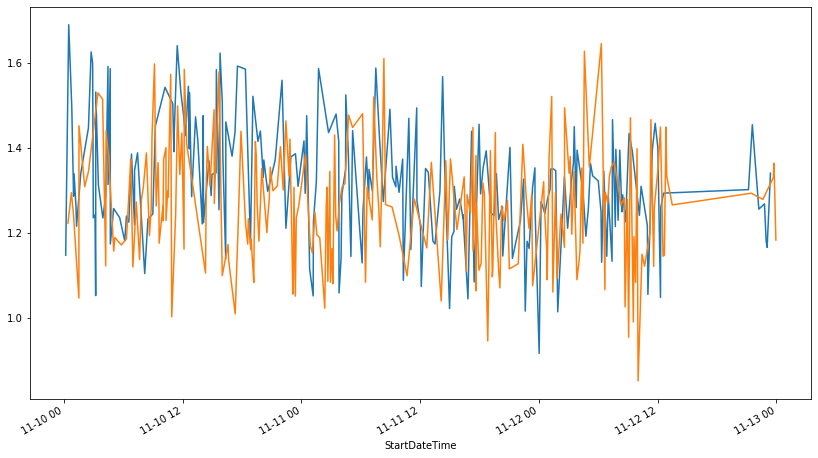

In [61]:
dt.groupby(omgbins)["GainArzMc_2p5"].plot(figsize=(14,8))

# qcut: 按分位数进行Binning

In [42]:
pd.qcut(x=dc,
       q=[0, .25, .5, .75, 1.],)

StartDateTime
2021-11-10 00:09:48    (0.848, 0.863]
2021-11-10 00:11:15    (0.795, 0.825]
2021-11-10 00:23:24    (0.863, 0.876]
2021-11-10 00:28:03    (0.795, 0.825]
2021-11-10 00:44:18    (0.863, 0.876]
2021-11-10 00:46:41    (0.795, 0.825]
2021-11-10 00:57:17    (0.848, 0.863]
2021-11-10 00:57:32    (0.825, 0.848]
2021-11-10 01:00:20    (0.825, 0.848]
2021-11-10 01:12:13    (0.825, 0.848]
2021-11-10 01:15:45    (0.795, 0.825]
2021-11-10 01:29:43    (0.863, 0.876]
2021-11-10 01:30:21    (0.848, 0.863]
2021-11-10 01:41:07    (0.825, 0.848]
2021-11-10 02:05:06    (0.863, 0.876]
Name: Omega, dtype: category
Categories (4, interval[float64, right]): [(0.795, 0.825] < (0.825, 0.848] < (0.848, 0.863] < (0.863, 0.876]]

## quantile

# 合并

In [24]:
df1_file = r'.\testfile\Pandas_Combine_Function_Summary\df1.txt'
df2_file = r'.\testfile\Pandas_Combine_Function_Summary\df2.txt'
df3_file = r'.\testfile\Pandas_Combine_Function_Summary\df3.txt'
df4_file = r'.\testfile\Pandas_Combine_Function_Summary\df4.txt'

In [32]:
df1 = pd.read_csv(df1_file,sep='\t',index_col=0)
print('df1:',df1,'-'*80,sep='\n')

# df2 VS df1:列名完全相同,行标有重复;不同的行标整行值有重复
df2 = pd.read_csv(df2_file,sep='\t',index_col=0)
print('df2:df2 VS df1:列名完全相同,行标有重复;不同的行标整行值有重复',df2,'-'*80,sep='\n')

# df3 VS df1:部分列名不一样,行标有重复,有一行是完全一样的,有一行索引是一样的,行里的值不完全一样
df3 = pd.read_csv(df3_file,sep='\t',index_col=0)
print('df3:df3 VS df1:部分列名不一样,行标有重复,有一行是完全一样的,有一行索引是一样的,行里的值不完全一样',df3,'-'*80,sep='\n')

# df4 VS df1: 所有内容都不同
df4 = pd.read_csv(df4_file,sep='\t',index_col=0)
print('df4:df4 VS df1: 所有内容都不同',df4,'-'*80,sep='\n')

df1:
      T004001_Value  T008017_Value  T008018_Value  T008019_Value
0  4165575909C8D151       0.844030       0.857502       0.899266
1  7A8FE2E6B1879F79       0.689586       0.700593       0.734714
2  9C3A943F11A5D0CD       0.725400       0.736979       0.772872
3  AE37B380AEE671D6       0.770358       0.782654       0.820772
4  A519DE8F4619BA9B       0.861562       0.875314       0.917945
--------------------------------------------------------------------------------
df2:df2 VS df1:列名完全相同,行标有重复;不同的行标整行值有重复
      T004001_Value  T008017_Value  T008018_Value  T008019_Value
3  AE37B380AEE671D6       0.770300       0.782654       0.820772
4  A519DE8F4619BA9B       0.861562       0.875314       0.917945
5  491174F1310FAE10       0.712732       0.724108       0.759375
6  147AA195EF70E796       0.681644       0.692524       0.726252
7  4165575909C8D151       0.844030       0.857502       0.899266
--------------------------------------------------------------------------------
df3:df3 VS df

## append:多个表格竖着拼
    1. 列对齐,列名相同的放在同一列,
    2. 只能往0轴方向合并; 
    3. 可以同时合并单个或多个DataFrame

In [7]:
print("df1+df2:")
df1.append(df2,
         # ignore_index=False,        #bool,False(默认)时,保持各自的行索引;True时,忽略原行索引,重新附给0,1,2,3...的行索引
         # verify_integrity=True,    #bool,合并后允(即ignore_index执行后)不允许有重复的行索引,False:允许;True:不允许
         # sort=False
          )

df1+df2:


,T004001_Value,T008017_Value,T008018_Value,T008019_Value
0,4165575909C8D151,0.844030,0.857502,0.899266
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872
3,AE37B380AEE671D6,0.770358,0.782654,0.820772
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945
3,AE37B380AEE671D6,0.770300,0.782654,0.820772
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945
5,491174F1310FAE10,0.712732,0.724108,0.759375
6,147AA195EF70E796,0.681644,0.692524,0.726252
7,4165575909C8D151,0.844030,0.857502,0.899266


In [12]:
# df1+df3:append会对列标进行对齐,df1,df3都有的列,会将df3的值添加到df1的下面,df3有,df1没有的,会将df3的列作为新列添加
df1.append(df3,sort=False,ignore_index=False)

,T004001_Value,T008017_Value,T008018_Value,T008019_Value,T008017,T008019
0,4165575909C8D151,0.844030,0.857502,0.899266,NaN,NaN
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714,NaN,NaN
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872,NaN,NaN
3,AE37B380AEE671D6,0.770358,0.782654,0.820772,NaN,NaN
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945,NaN,NaN
3,AE37B380AEE671D6,NaN,0.782654,NaN,0.770358,0.820772
4,A519DE8F4619BA9B,NaN,0.875000,NaN,0.800000,0.917945
5,491174F1310FAE10,NaN,0.724000,NaN,0.712732,0.759375
6,147AA195EF70E796,NaN,0.692524,NaN,0.681644,0.726000
7,2AE5077528A03BBD,NaN,0.782300,NaN,0.768556,0.818852


In [11]:
# 同时合并多个表
df1.append([df2,df3],sort=False,ignore_index=False)

,T004001_Value,T008017_Value,T008018_Value,T008019_Value,T008017,T008019
0,4165575909C8D151,0.844030,0.857502,0.899266,NaN,NaN
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714,NaN,NaN
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872,NaN,NaN
3,AE37B380AEE671D6,0.770358,0.782654,0.820772,NaN,NaN
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945,NaN,NaN
3,AE37B380AEE671D6,0.770300,0.782654,0.820772,NaN,NaN
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945,NaN,NaN
5,491174F1310FAE10,0.712732,0.724108,0.759375,NaN,NaN
6,147AA195EF70E796,0.681644,0.692524,0.726252,NaN,NaN
7,4165575909C8D151,0.844030,0.857502,0.899266,NaN,NaN


## concat():多个表格，索引对齐，横向或纵向拼接
    可以同时对多个表进行合并, 不管往哪个方向拼,都是以索引对齐,即相同索引名的放在一列/行

In [21]:
# 横着拼
pd.concat([df1,df2],
        axis=1,                 #往哪个方向拼, 不管哪个方向拼,都是以索引对齐,它允许列名重复
        # sort=True,              #是否排序
        # join='outer',           #取交还是取并
        # ignore_index=False,     #是否忽视原索引
        # # keys=['df1','df3'],     #注明数据来源
        # # # join_axes=[df1.index]   #指定根据那个表的轴拼接,貌似已经取消
        )

,T004001_Value,T008017_Value,T008018_Value,T008019_Value,T004001_Value,T008017_Value,T008018_Value,T008019_Value
0,4165575909C8D151,0.844030,0.857502,0.899266,NaN,NaN,NaN,NaN
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714,NaN,NaN,NaN,NaN
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872,NaN,NaN,NaN,NaN
3,AE37B380AEE671D6,0.770358,0.782654,0.820772,AE37B380AEE671D6,0.770300,0.782654,0.820772
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945,A519DE8F4619BA9B,0.861562,0.875314,0.917945
5,NaN,NaN,NaN,NaN,491174F1310FAE10,0.712732,0.724108,0.759375
6,NaN,NaN,NaN,NaN,147AA195EF70E796,0.681644,0.692524,0.726252
7,NaN,NaN,NaN,NaN,4165575909C8D151,0.844030,0.857502,0.899266


In [22]:
# 纵着拼
pd.concat([df1,df2],axis=0)

,T004001_Value,T008017_Value,T008018_Value,T008019_Value
0,4165575909C8D151,0.844030,0.857502,0.899266
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872
3,AE37B380AEE671D6,0.770358,0.782654,0.820772
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945
3,AE37B380AEE671D6,0.770300,0.782654,0.820772
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945
5,491174F1310FAE10,0.712732,0.724108,0.759375
6,147AA195EF70E796,0.681644,0.692524,0.726252
7,4165575909C8D151,0.844030,0.857502,0.899266


In [25]:
# 纵着拼，列名不完全相同
pd.concat([df1,df3],axis=0,join='outer')

,T004001_Value,T008017_Value,T008018_Value,T008019_Value,T008017,T008019
0,4165575909C8D151,0.844030,0.857502,0.899266,NaN,NaN
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714,NaN,NaN
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872,NaN,NaN
3,AE37B380AEE671D6,0.770358,0.782654,0.820772,NaN,NaN
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945,NaN,NaN
3,AE37B380AEE671D6,NaN,0.782654,NaN,0.770358,0.820772
4,A519DE8F4619BA9B,NaN,0.875000,NaN,0.800000,0.917945
5,491174F1310FAE10,NaN,0.724000,NaN,0.712732,0.759375
6,147AA195EF70E796,NaN,0.692524,NaN,0.681644,0.726000
7,2AE5077528A03BBD,NaN,0.782300,NaN,0.768556,0.818852


## merge:合并

In [19]:
df1 = pd.DataFrame({'key': ['foo', 'bar', 'baz','zzz'],
                    'f1key': ['zzz', 'bar', 'baz','foo'],
                    'value': [1, 2, 3, 5]})
df1

,key,f1key,value
0,foo,zzz,1
1,bar,bar,2
2,baz,baz,3
3,zzz,foo,5


In [20]:
df2 = pd.DataFrame({'key': ['xxx', 'bar', 'baz', 'foo'],
                    'f2key': ['foo', 'bar', 'baz', 'xxx'],
                    'value': [5, 2, 7, 8]})
df2

,key,f2key,value
0,xxx,foo,5
1,bar,bar,2
2,baz,baz,7
3,foo,xxx,8


In [38]:
df1.merge(df2)    #如果不传任何参数,则是真正的merge, 取每一列的值都相同的行

,key,f1key,value,f2key
0,bar,bar,2,bar


In [39]:
df1.merge(df2,how='outer')   #每一列对齐,在0轴上进行累加并去重

,key,f1key,value,f2key
0,foo,zzz,1,NaN
1,bar,bar,2,bar
2,baz,baz,3,NaN
3,zzz,foo,5,NaN
4,xxx,NaN,5,foo
5,baz,NaN,7,baz
6,foo,NaN,8,xxx


In [33]:
df1.merge(df2,on='key')   #使用共同的列名,进行对齐

,key,f1key,value_x,f2key,value_y
0,foo,zzz,1,xxx,8
1,bar,bar,2,bar,2
2,baz,baz,3,baz,7


In [34]:
df1.merge(df2,left_on='f1key',right_on='f2key')  #使用不同的列名,进行对齐

,key_x,f1key,value_x,key_y,f2key,value_y
0,bar,bar,2,bar,bar,2
1,baz,baz,3,baz,baz,7
2,zzz,foo,5,xxx,foo,5


In [35]:
df1.merge(df2,left_on='f1key',right_on='f2key',suffixes=('_left', '_right'))    # 注明前缀

,key_left,f1key,value_left,key_right,f2key,value_right
0,bar,bar,2,bar,bar,2
1,baz,baz,3,baz,baz,7
2,zzz,foo,5,xxx,foo,5


## merge_orderd:

In [ ]:
函数允许组合时间序列和其他有序数据。 特别是它有一个可选的fill_method关键字来填充/插入缺失的数据。

In [ ]:
（1）如果 left_by 与 right_by 均为空，等价于 merge
（2）如果 left_by 或 right_by 不为空，会先按这个参数值对 DataFrame 进行分组，将分组后的 DataFrame 再进行连接
如果，“left_by 或 right_by 的值” 与 “连接关键字” 相同，那无论是什么连接方式，结果都一样

In [40]:
df1 = pd.DataFrame(
{
"key": ["a", "c", "e", "a", "c", "e"],
"lvalue": [1, 2, 3, 1, 2, 3],
"group": ["a", "a", "a", "b", "b", "b"]
}
)
df1

,key,lvalue,group
0,a,1,a
1,c,2,a
2,e,3,a
3,a,1,b
4,c,2,b
5,e,3,b


In [41]:
df2 = pd.DataFrame({"key": ["b", "c", "d"], "rvalue": [1, 2, 3]})
df2

,key,rvalue
0,b,1
1,c,2
2,d,3


In [44]:
pd.merge_ordered(df1, df2, fill_method="ffill", left_by="key")

,key,lvalue,group,rvalue
0,a,1,a,NaN
1,a,1,b,NaN
2,c,2,a,2.0
3,c,2,b,2.0
4,e,3,a,NaN
5,e,3,b,NaN


## merge_asof

In [47]:
left = pd.DataFrame({"a": [1, 5, 10], "left_val": ["a", "b", "c"]})
left

,a,left_val
0,1,a
1,5,b
2,10,c


In [48]:
right = pd.DataFrame({"a": [1, 2, 3, 6, 7], "right_val": [1, 2, 3, 6, 7]})
right

,a,right_val
0,1,1
1,2,2
2,3,3
3,6,6
4,7,7


In [50]:
pd.merge_asof(left, right, on="a")   #右边DataFrame "a"中并没有 1,5,10, 但是它的 1:1, 3:5(3离5近), 7:10(7离10近)

,a,left_val,right_val
0,1,a,1
1,5,b,3
2,10,c,7


In [49]:
pd.merge_asof(left, right, on="a", allow_exact_matches=False)

,a,left_val,right_val
0,1,a,NaN
1,5,b,3.0
2,10,c,7.0


## combine(): 列名对齐,逐列按条件取舍

In [30]:
df1_combine = pd.DataFrame({'A': [0, 5], 'B': [4, 8]})
df2_combine = pd.DataFrame({'A': [1, 2], 'B': [6, 3]})

In [31]:
df1_combine

,A,B
0,0,4
1,5,8


In [32]:
df2_combine

,A,B
0,1,6
1,2,3


In [50]:
def cob_func(s1,s2):  #s1,s2是逐列转递
    lt = []
    for i in range(max([df2_combine.shape[0],df2_combine.shape[0]])):
        lt.append(min(s1[i],s2[i]))
    return lt

In [51]:
# 对照两个表格，取相同列每一行最小的那个值，注意：数据是一列一列传递个func的
df1_combine.combine(df2_combine, cob_func)

,A,B
0,0,4
1,2,3


## join():多个表格，横着拼,合并后列名不能重复,对齐方式稍微灵活

In [35]:
df1
df2 = df2.reset_index(drop=True)
df2

,T004001_Value,T008017_Value,T008018_Value,T008019_Value
0,4165575909C8D151,0.844030,0.857502,0.899266
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872
3,AE37B380AEE671D6,0.770358,0.782654,0.820772
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945


,T004001_Value,T008017_Value,T008018_Value,T008019_Value
0,AE37B380AEE671D6,0.770300,0.782654,0.820772
1,A519DE8F4619BA9B,0.861562,0.875314,0.917945
2,491174F1310FAE10,0.712732,0.724108,0.759375
3,147AA195EF70E796,0.681644,0.692524,0.726252
4,4165575909C8D151,0.844030,0.857502,0.899266


### 对齐index,在列方向上拼接

In [34]:
df1.join(df2,
        # how = 'outer',
        lsuffix='_df1',  #如果列名有重复,必须指定 suffix参数;
        rsuffix='_df2'
        )

,T004001_Value_df1,T008017_Value_df1,T008018_Value_df1,T008019_Value_df1,T004001_Value_df2,T008017_Value_df2,T008018_Value_df2,T008019_Value_df2
0,4165575909C8D151,0.844030,0.857502,0.899266,AE37B380AEE671D6,0.770300,0.782654,0.820772
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714,A519DE8F4619BA9B,0.861562,0.875314,0.917945
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872,491174F1310FAE10,0.712732,0.724108,0.759375
3,AE37B380AEE671D6,0.770358,0.782654,0.820772,147AA195EF70E796,0.681644,0.692524,0.726252
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945,4165575909C8D151,0.844030,0.857502,0.899266


### 指定相同的列名作为对齐列

In [43]:
df1['key'] = [7,8,9,10,11]
df2 = df2.set_index("T008017_Value")
df1
df2

,T004001_Value,T008017_Value,T008018_Value,T008019_Value,key
0,4165575909C8D151,0.844030,0.857502,0.899266,7
1,7A8FE2E6B1879F79,0.689586,0.700593,0.734714,8
2,9C3A943F11A5D0CD,0.725400,0.736979,0.772872,9
3,AE37B380AEE671D6,0.770358,0.782654,0.820772,10
4,A519DE8F4619BA9B,0.861562,0.875314,0.917945,11


,T008018_Value,T008019_Value
T008017_Value,,
0.770300,0.782654,0.820772
0.861562,0.875314,0.917945
0.712732,0.724108,0.759375
0.681644,0.692524,0.726252
0.844030,0.857502,0.899266


In [44]:
df1.join(df2,
         on="key",        #使用on时,必须在df1中存在,df2中可以不存在, 当在df2中不存在时,默认使用df的index, 注意:数据类型需要相同
         how = 'outer',
         lsuffix='_df1',
         rsuffix='_df2'
        )

C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\pandas\core\reshape\merge.py:1215: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,T004001_Value,T008017_Value,T008018_Value_df1,T008019_Value_df1,key,T008018_Value_df2,T008019_Value_df2
0.0,4165575909C8D151,0.844030,0.857502,0.899266,7.000000,NaN,NaN
1.0,7A8FE2E6B1879F79,0.689586,0.700593,0.734714,8.000000,NaN,NaN
2.0,9C3A943F11A5D0CD,0.725400,0.736979,0.772872,9.000000,NaN,NaN
3.0,AE37B380AEE671D6,0.770358,0.782654,0.820772,10.000000,NaN,NaN
4.0,A519DE8F4619BA9B,0.861562,0.875314,0.917945,11.000000,NaN,NaN
NaN,NaN,NaN,NaN,NaN,0.770300,0.782654,0.820772
NaN,NaN,NaN,NaN,NaN,0.861562,0.875314,0.917945
NaN,NaN,NaN,NaN,NaN,0.712732,0.724108,0.759375
NaN,NaN,NaN,NaN,NaN,0.681644,0.692524,0.726252
NaN,NaN,NaN,NaN,NaN,0.844030,0.857502,0.899266


# wide_to_long: 同时stack多列

In [45]:
df = pd.DataFrame({"A1970" : {0 : "a", 1 : "b", 2 : "c"},
"A1980" : {0 : "d", 1 : "e", 2 : "f"},
"B1970" : {0 : 2.5, 1 : 1.2, 2 : .7},
"B1980" : {0 : 3.2, 1 : 1.3, 2 : .1},
"X" : dict(zip(range(3), np.random.randn(3)))})
df["id"] = df.index

In [46]:
df

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,1.198743,0
1,b,e,1.2,1.3,0.212173,1
2,c,f,0.7,0.1,-0.317060,2


### 特定列的宽转长

In [53]:
pd.wide_to_long(df=df,
                stubnames=["A", "B"],   #设置stubnames，函数会根据设置的字符去数据列中匹配目标列，然后转换为长数据
                i="id", 
                j="year",
               # sep="_",     #有个默认分割,
               )

,,X,A,B
id,year,,,
0,1970,1.198743,a,2.5
1,1970,0.212173,b,1.2
2,1970,-0.317060,c,0.7
0,1980,1.198743,d,3.2
1,1980,0.212173,e,1.3
2,1980,-0.317060,f,0.1


In [54]:
pd.wide_to_long(df=df,
                stubnames=["A", "C"],   #设置stubnames，函数会根据设置的字符去数据列中匹配目标列，然后转换为长数据
                i="id", 
                j="year",
               # sep="_",     #有个默认分割,
               )

,,X,B1970,B1980,A,C
id,year,,,,,
0,1970,1.198743,2.5,3.2,a,NaN
1,1970,0.212173,1.2,1.3,b,NaN
2,1970,-0.317060,0.7,0.1,c,NaN
0,1980,1.198743,2.5,3.2,d,NaN
1,1980,0.212173,1.2,1.3,e,NaN
2,1980,-0.317060,0.7,0.1,f,NaN


In [57]:
pd.wide_to_long(df=df,
                stubnames=["A", "B"],   #设置stubnames，函数会根据设置的字符去数据列中匹配目标列，然后转换为长数据
                i=["id","X"],
                j="year",
               # sep="_",     #default "",
               )

A    B
id X         year        
0   1.198743 1970  a  2.5
             1980  d  3.2
1   0.212173 1970  b  1.2
             1980  e  1.3
2  -0.317060 1970  c  0.7
             1980  f  0.1

In [60]:
pd.wide_to_long(df=df,
                stubnames=["A", "B"],   #设置stubnames，函数会根据设置的字符去数据列中匹配目标列，然后转换为长数据
                i="id", 
                j="year",
               # sep="_",     #有个默认分割,
                suffix='1970',
               )

,,X,B1980,A1980,A,B
id,year,,,,,
0,1970,1.198743,3.2,d,a,2.5
1,1970,0.212173,1.3,e,b,1.2
2,1970,-0.317060,0.1,f,c,0.7
